In [1]:
#importing modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in dataset from https://data.detroitmi.gov/datasets/8e532daeec1149879bd5e67fdd9c8be0_0/explore?location=0.921009%2C-83.095882%2C0.00&showTable=true
crimedata = pd.read_csv("/Users/nikhilmaganti/Desktop/RMS_Crime_Incidents.csv", low_memory=False)

In [3]:
#printing first 5 rows
crimedata.head()

,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,incident_time,incident_day_of_week,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
0,912600-2201,NaN,BURGLARY,BURGLARY - FORCED ENTRY,2201,22001,BURGLARY - FORCED ENTRY ...,2023/01/09 13:45:00+00,08:45:00,1,...,2301090077,0911,09,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1299905-5001,NaN,OBSTRUCTING JUDICIARY,OBSTRUCTING JUSTICE,5001,50000,OBSTRUCTING JUSTICE ...,2025/06/22 21:00:00+00,17:00:00,7,...,2506250354,0802,08,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1299580-1301,NaN,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT ...,2025/06/25 04:30:00+00,00:30:00,3,...,2506250010,0406,04,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1299317-2900,NaN,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,2900,29000,DAMAGE TO PROPERTY,2025/06/24 20:05:00+00,16:05:00,2,...,2506240319,0806,08,NaN,NaN,NaN,NaN,NaN,NaN,4
4,1299914-3072,NaN,FRAUD,RETAIL FRAUD - THEFT,3072,30002,RETAIL FRAUD - THEFT ...,2025/06/26 01:58:00+00,21:58:00,3,...,2506250381,0204,02,NaN,NaN,NaN,NaN,NaN,NaN,5


In [4]:
#printing last 5 rows
crimedata.tail()

,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,incident_time,incident_day_of_week,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
720253,911067-2101,NaN,EXTORTION,EXTORTION,2101,21000,EXTORTION,2023/01/05 20:35:00+00,15:35:00,4,...,2301050357,1104,11,NaN,NaN,NaN,NaN,NaN,NaN,720254
720254,1129715-1301,NaN,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT ...,2024/05/23 15:28:00+00,11:28:00,4,...,2405230228,0905,09,NaN,NaN,NaN,NaN,NaN,NaN,720255
720255,970518-1301,NaN,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2023/05/28 05:39:00+00,01:39:00,7,...,2305270344,0302,03,NaN,NaN,NaN,NaN,NaN,NaN,720256
720256,1084961-1301,NaN,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2024/02/10 02:30:00+00,21:30:00,5,...,2402090364,0803,08,NaN,NaN,NaN,NaN,NaN,NaN,720257
720257,1154745-1301,NaN,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2024/07/16 14:21:00+00,10:21:00,2,...,2407170128,1206,12,NaN,NaN,NaN,NaN,NaN,NaN,720258


In [5]:
#looking at column types
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720258 entries, 0 to 720257
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   incident_entry_id        720258 non-null  object 
 1   nearest_intersection     0 non-null       float64
 2   offense_category         720258 non-null  object 
 3   offense_description      720258 non-null  object 
 4   state_offense_code       720258 non-null  int64  
 5   arrest_charge            720258 non-null  object 
 6   charge_description       720258 non-null  object 
 7   incident_occurred_at     720258 non-null  object 
 8   incident_time            720258 non-null  object 
 9   incident_day_of_week     720258 non-null  int64  
 10  incident_hour_of_day     720258 non-null  int64  
 11  incident_year            720258 non-null  int64  
 12  case_id                  720258 non-null  int64  
 13  case_status              720258 non-null  object 
 14  case

In [6]:
#converting "incident_timestamp" and "incident_time" to datetime format
crimedata['incident_occurred_at'] = pd.to_datetime(crimedata['incident_occurred_at'])
crimedata['incident_time'] = pd.to_datetime(crimedata['incident_time'])
format="%m/%d/%Y %I:%M %p"

/var/folders/8m/v7cth1bj6hbgc9zth_x5drw40000gn/T/ipykernel_90580/33816821.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimedata['incident_time'] = pd.to_datetime(crimedata['incident_time'])


In [7]:
#counts of crime across years
crimedata['incident_year'].value_counts()

incident_year
2023    90457
2024    88396
2019    85332
2022    83773
2018    83585
2017    83075
2020    79037
2021    78896
2025    39381
2016     6341
2015      452
2014      317
2013      238
2012      182
2011      134
2010      133
2008       66
2009       64
2002       54
2007       51
2000       45
2001       41
2004       33
2006       25
2005       25
2003       20
1995       10
1991        8
1999        7
1989        5
1994        5
1978        5
1993        4
1980        4
1977        4
1976        4
1986        4
1997        4
1983        4
1990        3
1998        3
1979        3
1996        3
1915        2
1918        2
1988        2
1984        2
1992        2
1973        2
1985        2
1920        2
1923        2
1963        1
1921        1
1961        1
1951        1
1987        1
1974        1
1981        1
Name: count, dtype: int64

In [8]:
#The underwhelming number of reports prior to 2016 (and especially pre-21st century) is likely due to changes in data collection or even typos. 
# No doubt 1996 had more than a single instance of crime that year! In fact, data from 2015 and before accounts for only .049% of the data! 
# With that said, reasonable inferences can't be made from this particular subset, and since the number of rows is so minimal, we will simply drop 
# them and focus on the reports from 2016 and on.

#dropping rows
crimedata = crimedata[crimedata['incident_year'] > 2015]
print(crimedata)

       incident_entry_id  nearest_intersection       offense_category  \
0            912600-2201                   NaN               BURGLARY   
1           1299905-5001                   NaN  OBSTRUCTING JUDICIARY   
2           1299580-1301                   NaN                ASSAULT   
3           1299317-2900                   NaN     DAMAGE TO PROPERTY   
4           1299914-3072                   NaN                  FRAUD   
...                  ...                   ...                    ...   
720253       911067-2101                   NaN              EXTORTION   
720254      1129715-1301                   NaN                ASSAULT   
720255       970518-1301                   NaN                ASSAULT   
720256      1084961-1301                   NaN                ASSAULT   
720257      1154745-1301                   NaN                ASSAULT   

                       offense_description  state_offense_code arrest_charge  \
0                  BURGLARY - FORCED ENTRY 

In [9]:
#number of rows remaining
print("Number of rows remaining: " + str(len(crimedata)))

Number of rows remaining: 718273


In [10]:
#Since there is no separate month column, I will create one
crimedata['month'] = pd.DatetimeIndex(crimedata['incident_time']).month

In [11]:
print(crimedata.describe())


       nearest_intersection  state_offense_code  \
count                   0.0       718273.000000   
mean                    NaN         2396.668523   
min                     NaN          901.000000   
25%                     NaN         1302.000000   
50%                     NaN         2306.000000   
75%                     NaN         2900.000000   
max                     NaN         9915.000000   
std                     NaN         1147.106295   

                       incident_time  incident_day_of_week  \
count                         718273         718273.000000   
mean   2025-07-02 12:57:55.203077120              4.011487   
min              2025-07-02 00:00:00              1.000000   
25%              2025-07-02 07:49:00              2.000000   
50%              2025-07-02 14:00:00              4.000000   
75%              2025-07-02 19:00:00              6.000000   
max              2025-07-02 23:59:00              7.000000   
std                              NaN        

In [12]:
#II. Identifying and Visualizing Trends

#Types and Frequencies of crimes
print(crimedata['offense_category'].value_counts())

offense_category
ASSAULT                   132527
LARCENY                   106410
DAMAGE TO PROPERTY         93879
AGGRAVATED ASSAULT         71764
STOLEN VEHICLE             64447
FRAUD                      59477
BURGLARY                   52723
WEAPONS OFFENSES           26642
STOLEN PROPERTY            15857
ROBBERY                    15428
DANGEROUS DRUGS            12406
SEX OFFENSES                9252
OBSTRUCTING JUDICIARY       9198
OBSTRUCTING THE POLICE      9032
SEXUAL ASSAULT              5955
ARSON                       5374
RUNAWAY                     4926
OUIL                        4298
FAMILY OFFENSE              4264
OTHER                       2606
MISCELLANEOUS               2393
HOMICIDE                    2338
DISORDERLY CONDUCT          2320
FORGERY                     1837
KIDNAPPING                  1607
LIQUOR                       599
EXTORTION                    466
JUSTIFIABLE HOMICIDE         188
SOLICITATION                  46
GAMBLING                  

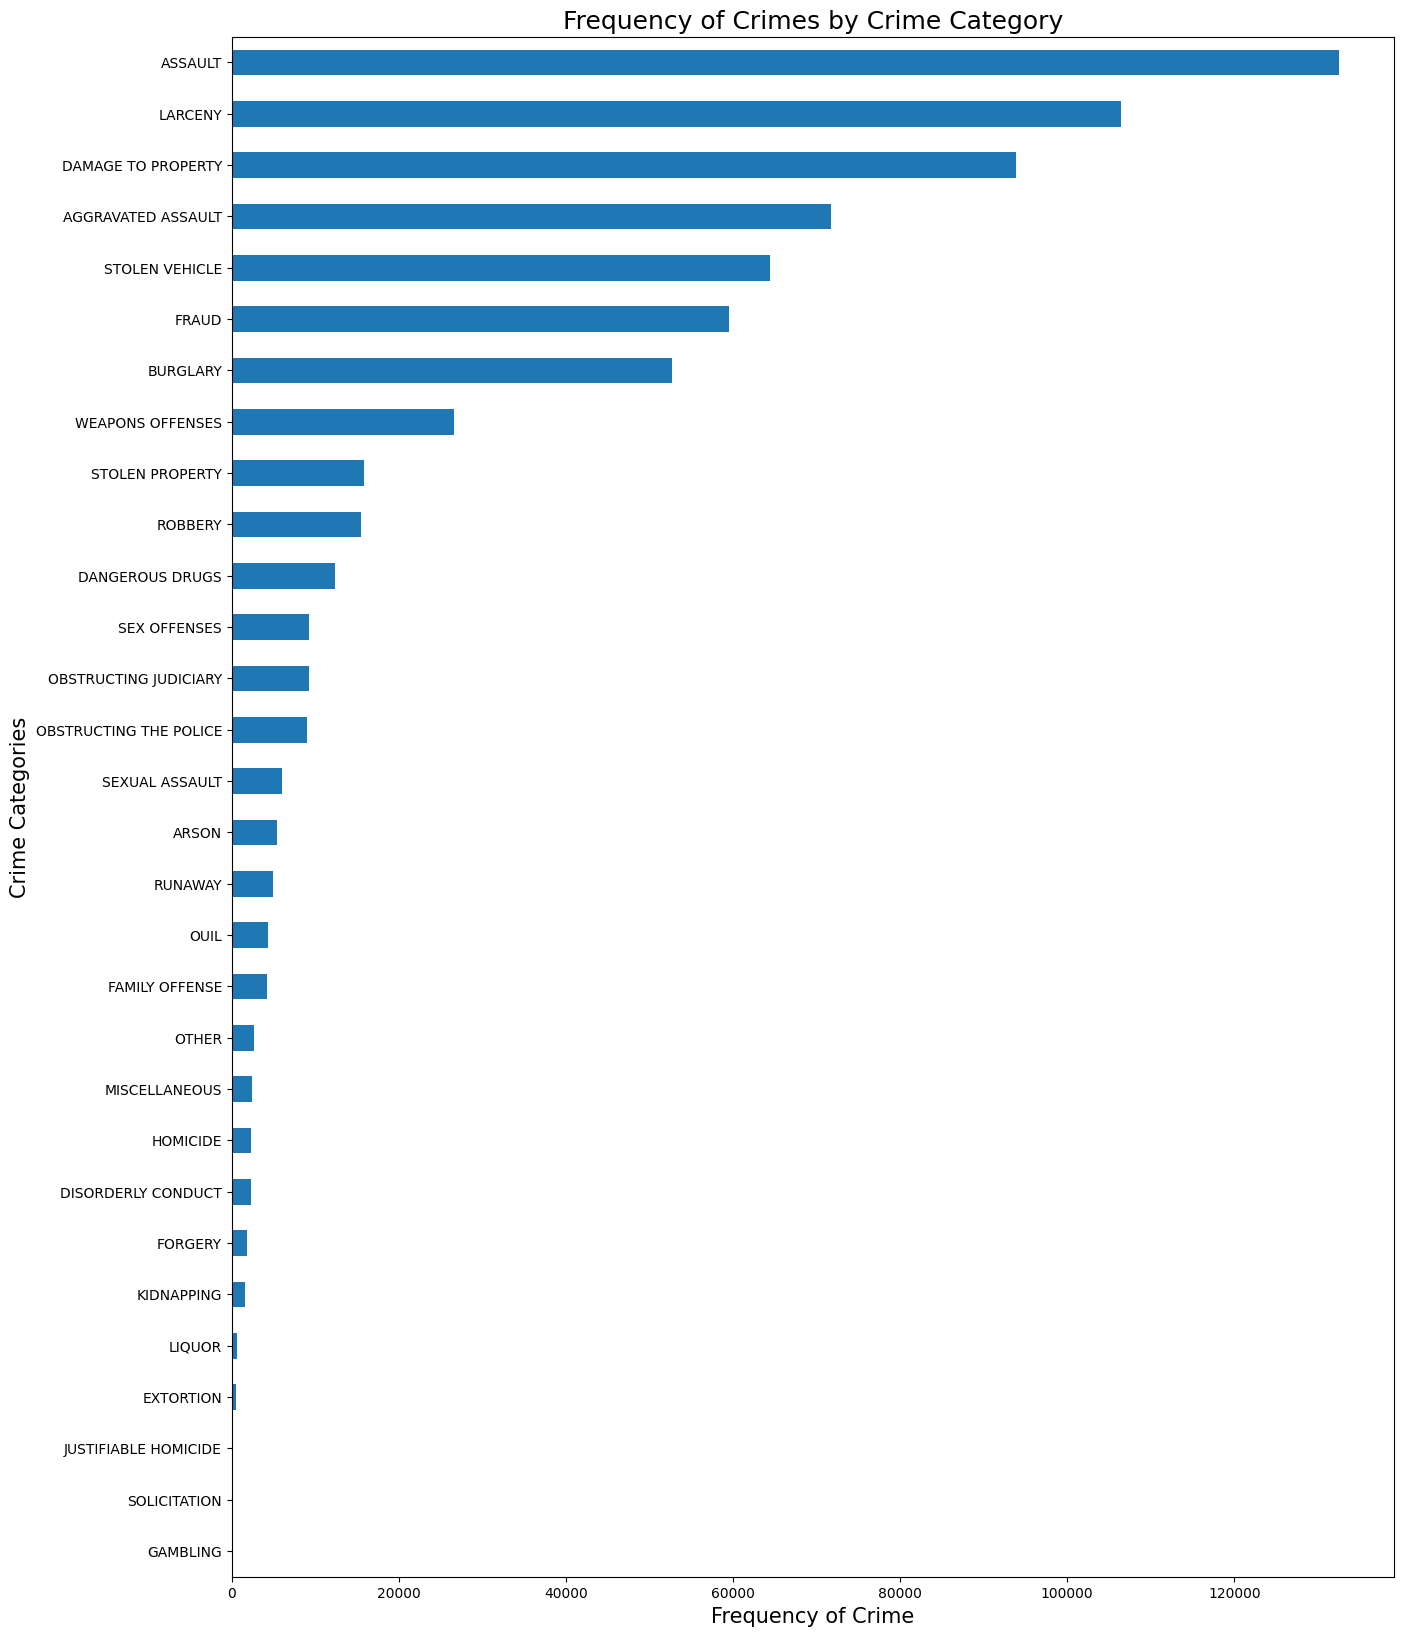

In [13]:
#Plotting a histogam for visual representation of scale
#plotting histogram for scale

fig = plt.figure(figsize = (15, 20))
ax = crimedata['offense_category'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Frequency of Crimes by Crime Category", fontsize = 18)
plt.xlabel("Frequency of Crime", fontsize = 15)
plt.ylabel("Crime Categories", fontsize = 15)
plt.show()

/var/folders/8m/v7cth1bj6hbgc9zth_x5drw40000gn/T/ipykernel_90580/462640161.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plot_data = crimedata.groupby(pd.Grouper(key='incident_occurred_at', freq='M')).count()['report_number']


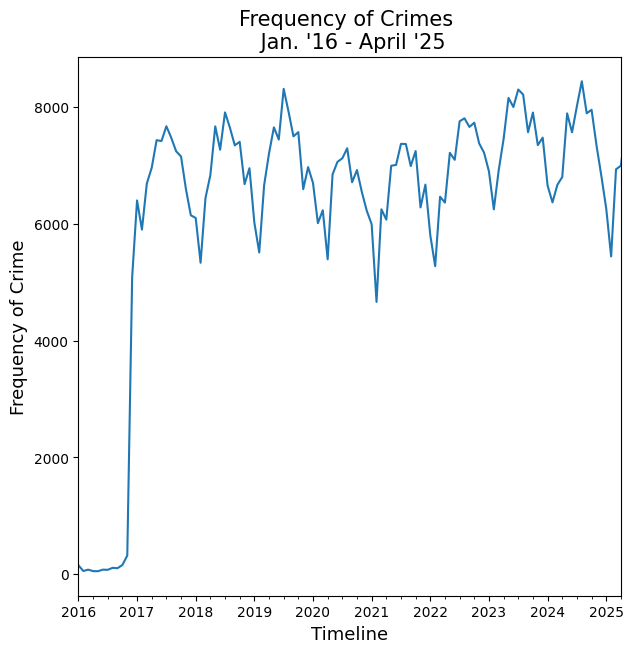

In [14]:
#Plotting Frequency of Crime across time after 2015

fig, ax = plt.subplots(figsize=(7,7))
plot_data = crimedata.groupby(pd.Grouper(key='incident_occurred_at', freq='M')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim(['2016-01-01' , '2025-4-30'])
plt.title("Frequency of Crimes \n Jan. '16 - April '25", fontsize = 15)
plt.xlabel("Timeline", fontsize = 13)
plt.ylabel("Frequency of Crime", fontsize = 13)
plt.show()


In [15]:
#crime distribution across months or days of the week.
crimedata['month'] = crimedata['incident_occurred_at'].dt.month
crimedata['month'].value_counts()

month
5     67556
6     65077
7     62518
8     62260
4     60118
10    60032
12    59559
3     59323
9     58997
1     56972
11    55071
2     50790
Name: count, dtype: int64

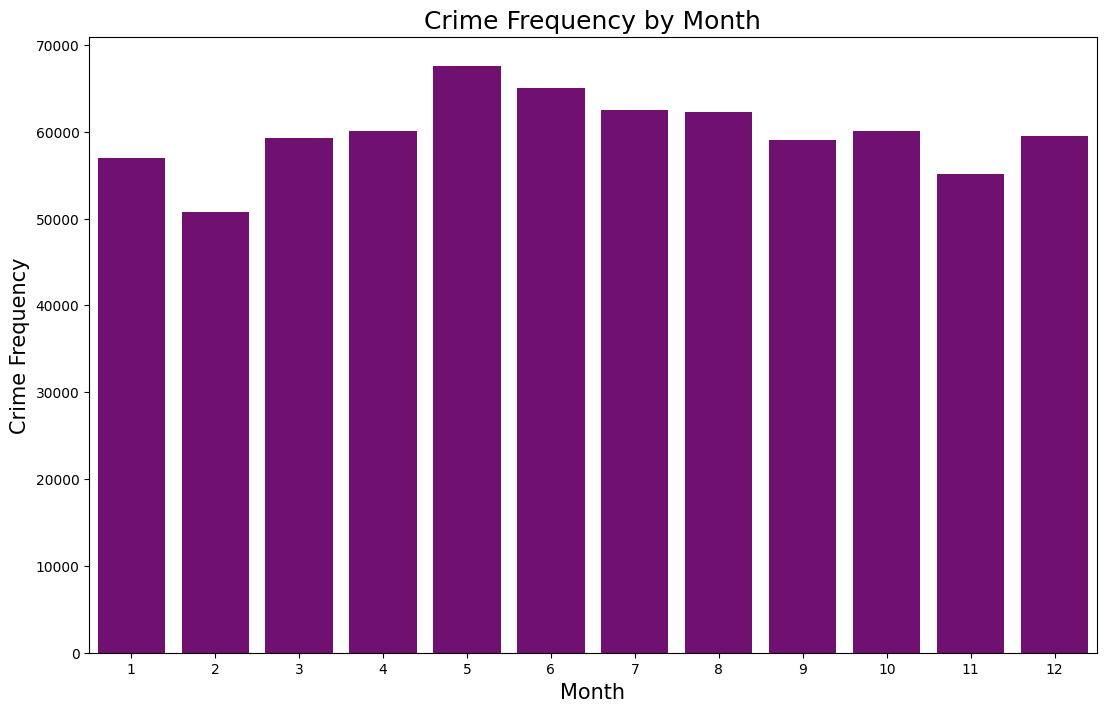

In [16]:
#Crime Frequency by month histogram
plt.figure(figsize=(13,8))
sns.countplot(x='month', data=crimedata, color='purple')
plt.title('Crime Frequency by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Crime Frequency', fontsize = 15)
plt.show()

In [17]:
crimedata['incident_hour_of_day'].value_counts()

incident_hour_of_day
0     46253
12    42204
22    38151
17    37201
23    37133
20    36974
16    36905
21    36529
18    36148
15    35780
19    35107
14    31298
1     30513
13    30416
11    28872
10    28552
2     25762
9     24833
3     21258
8     21116
4     16641
7     14595
5     13895
6     12137
Name: count, dtype: int64

Text(0, 0.5, 'Crime Frequency')

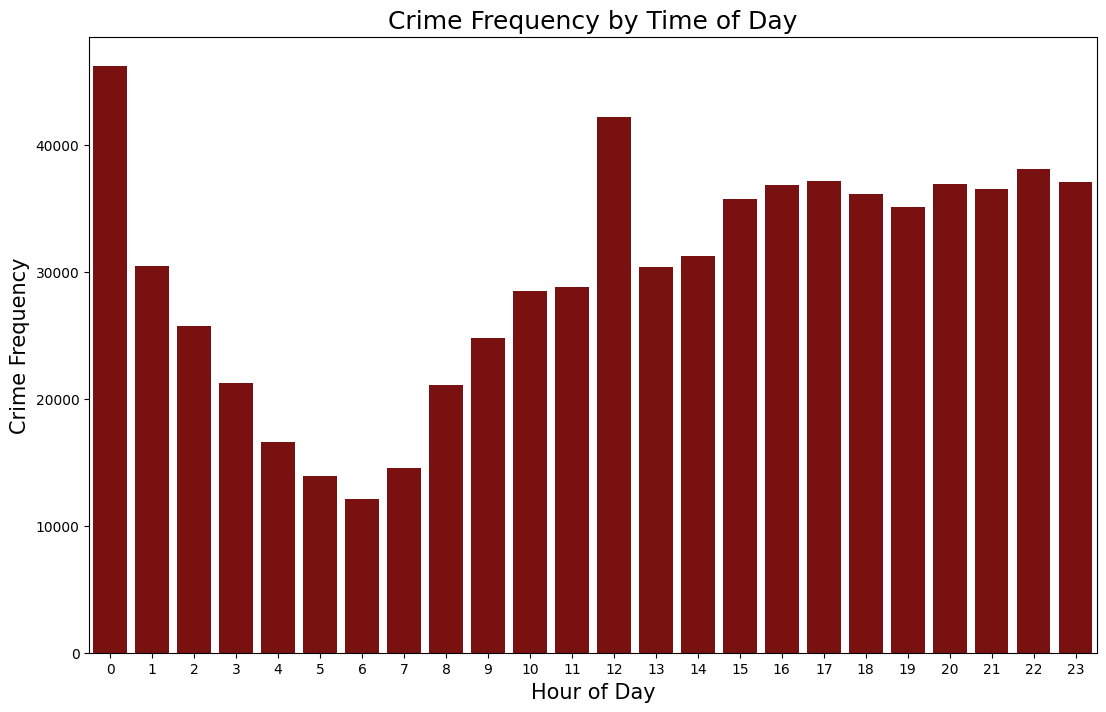

In [18]:
#Crime Frequency by time of day
plt.figure(figsize=(13,8))
sns.countplot(x='incident_hour_of_day', data=crimedata, color='darkred')
plt.title('Crime Frequency by Time of Day', fontsize = 18)
plt.xlabel('Hour of Day', fontsize = 15)
plt.ylabel('Crime Frequency', fontsize = 15)

In [19]:
#10 most frequent crimes by day of the week.
crimedata.groupby('incident_day_of_week')['offense_category'].apply(lambda x: x.value_counts().head(10))

incident_day_of_week                    
1                     ASSAULT               18833
                      LARCENY               14602
                      DAMAGE TO PROPERTY    13323
                      AGGRAVATED ASSAULT     9985
                      STOLEN VEHICLE         9559
                                            ...  
7                     BURGLARY               6928
                      FRAUD                  6091
                      WEAPONS OFFENSES       2996
                      ROBBERY                2294
                      STOLEN PROPERTY        1736
Name: offense_category, Length: 70, dtype: int64

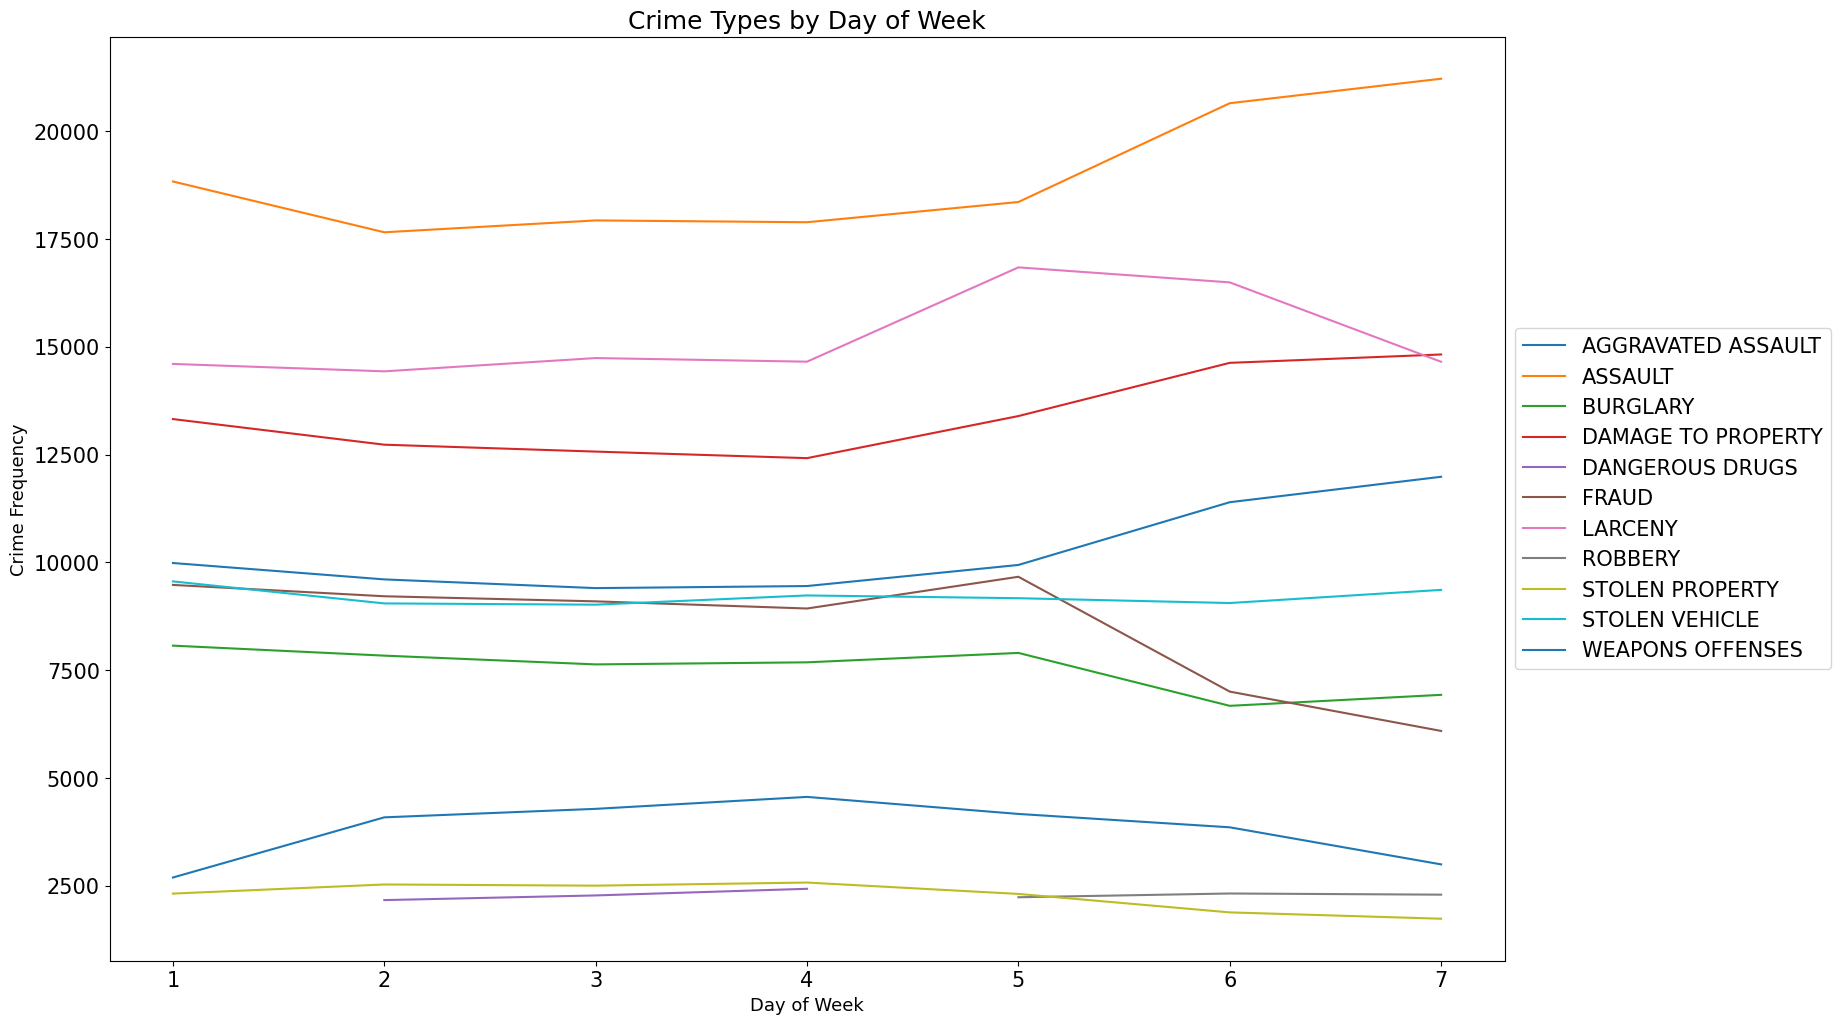

In [20]:
#Crime types by day of week
fig, ax = plt.subplots(figsize=(18,12))
crimedata.groupby('incident_day_of_week')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Day of Week', fontsize = 18)
ax.set_xlabel('Day of Week', fontsize = 13)
ax.set_ylabel('Crime Frequency', fontsize = 13)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

In [21]:
#10 most frequent crimes by hour of the day
crimedata.groupby('incident_hour_of_day')['offense_category'].apply(lambda x: x.value_counts().head(10))

incident_hour_of_day                        
0                     ASSAULT                   8150
                      LARCENY                   6179
                      DAMAGE TO PROPERTY        5934
                      FRAUD                     5215
                      AGGRAVATED ASSAULT        4752
                                                ... 
23                    WEAPONS OFFENSES          2148
                      BURGLARY                  1638
                      ROBBERY                    950
                      FRAUD                      863
                      OBSTRUCTING THE POLICE     603
Name: offense_category, Length: 240, dtype: int64

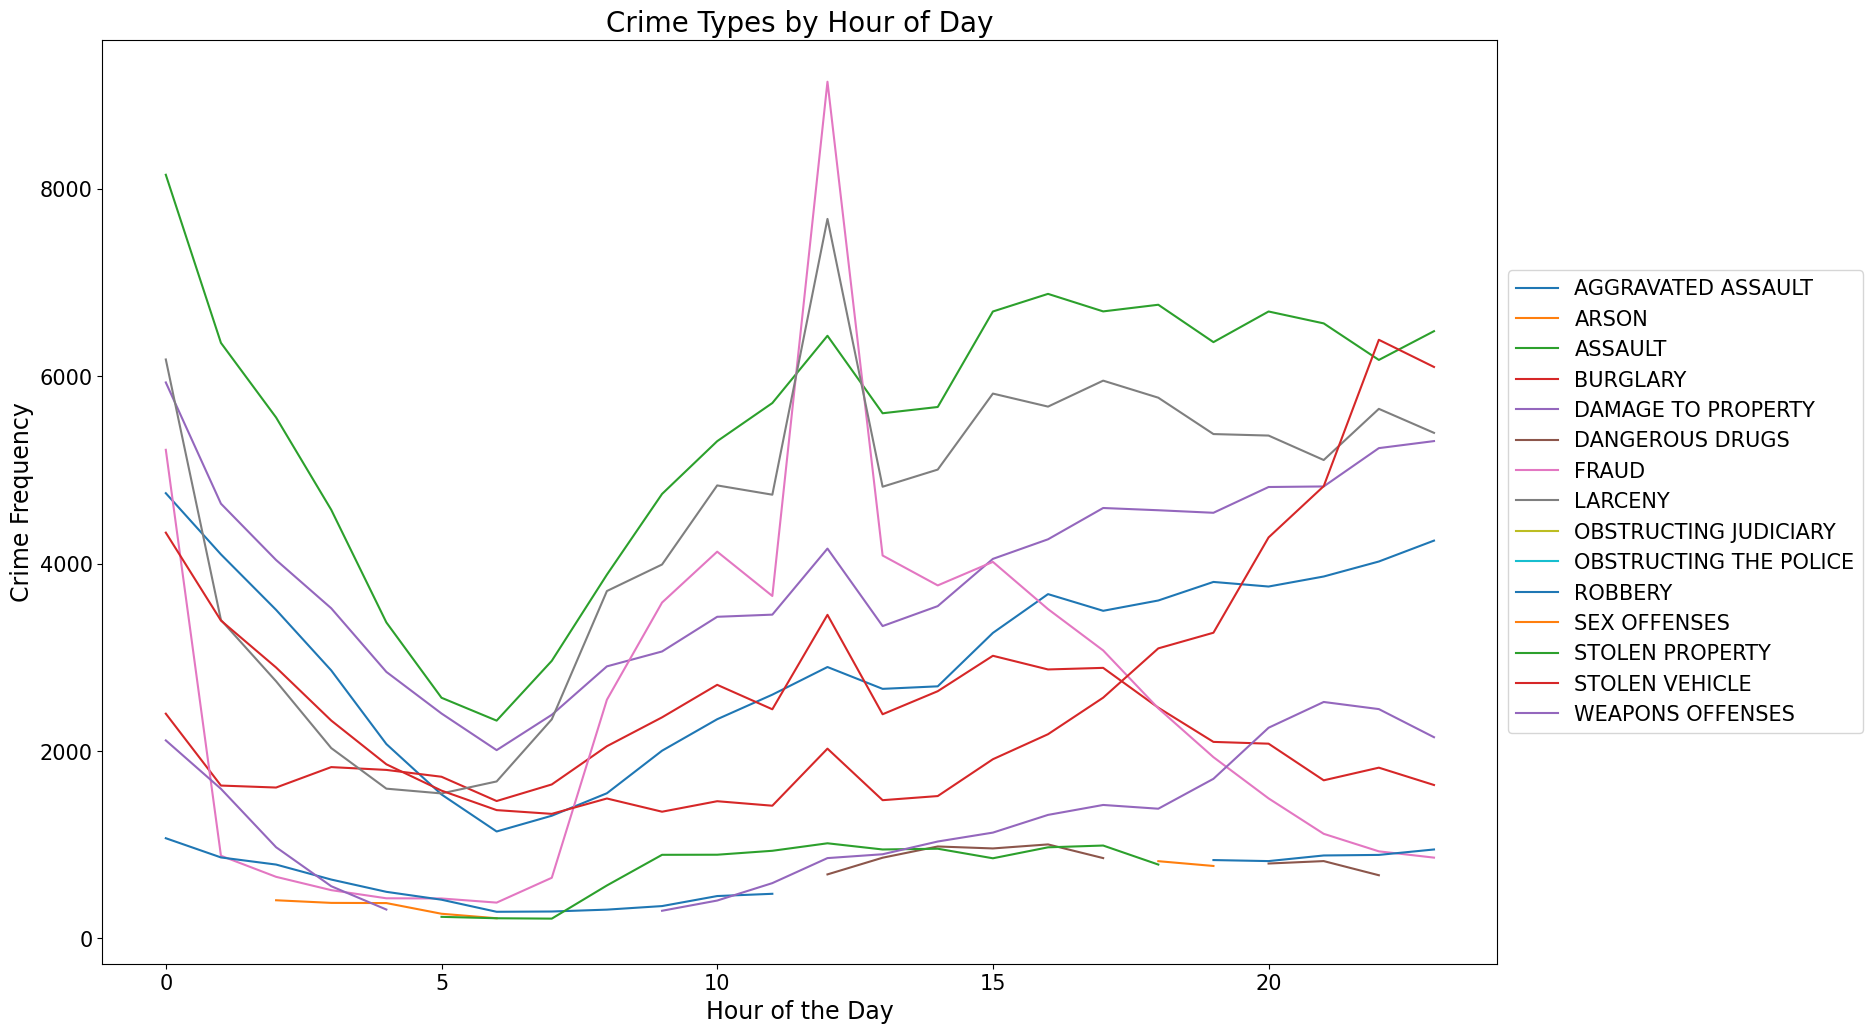

In [22]:
#Crime types by hour of the day
fig, ax = plt.subplots(figsize=(18,12))
crimedata.groupby('incident_hour_of_day')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Hour of Day', fontsize = 20)
ax.set_xlabel('Hour of the Day', fontsize = 17)
ax.set_ylabel('Crime Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})

In [23]:
#Top crimes per month
crimedata.groupby('month')['offense_category'].apply(lambda x: x.value_counts().head(10))

month                    
1      ASSAULT               10164
       LARCENY                8521
       DAMAGE TO PROPERTY     7330
       FRAUD                  5368
       STOLEN VEHICLE         5362
                             ...  
12     BURGLARY               5101
       FRAUD                  4837
       WEAPONS OFFENSES       1875
       ROBBERY                1401
       STOLEN PROPERTY        1344
Name: offense_category, Length: 120, dtype: int64

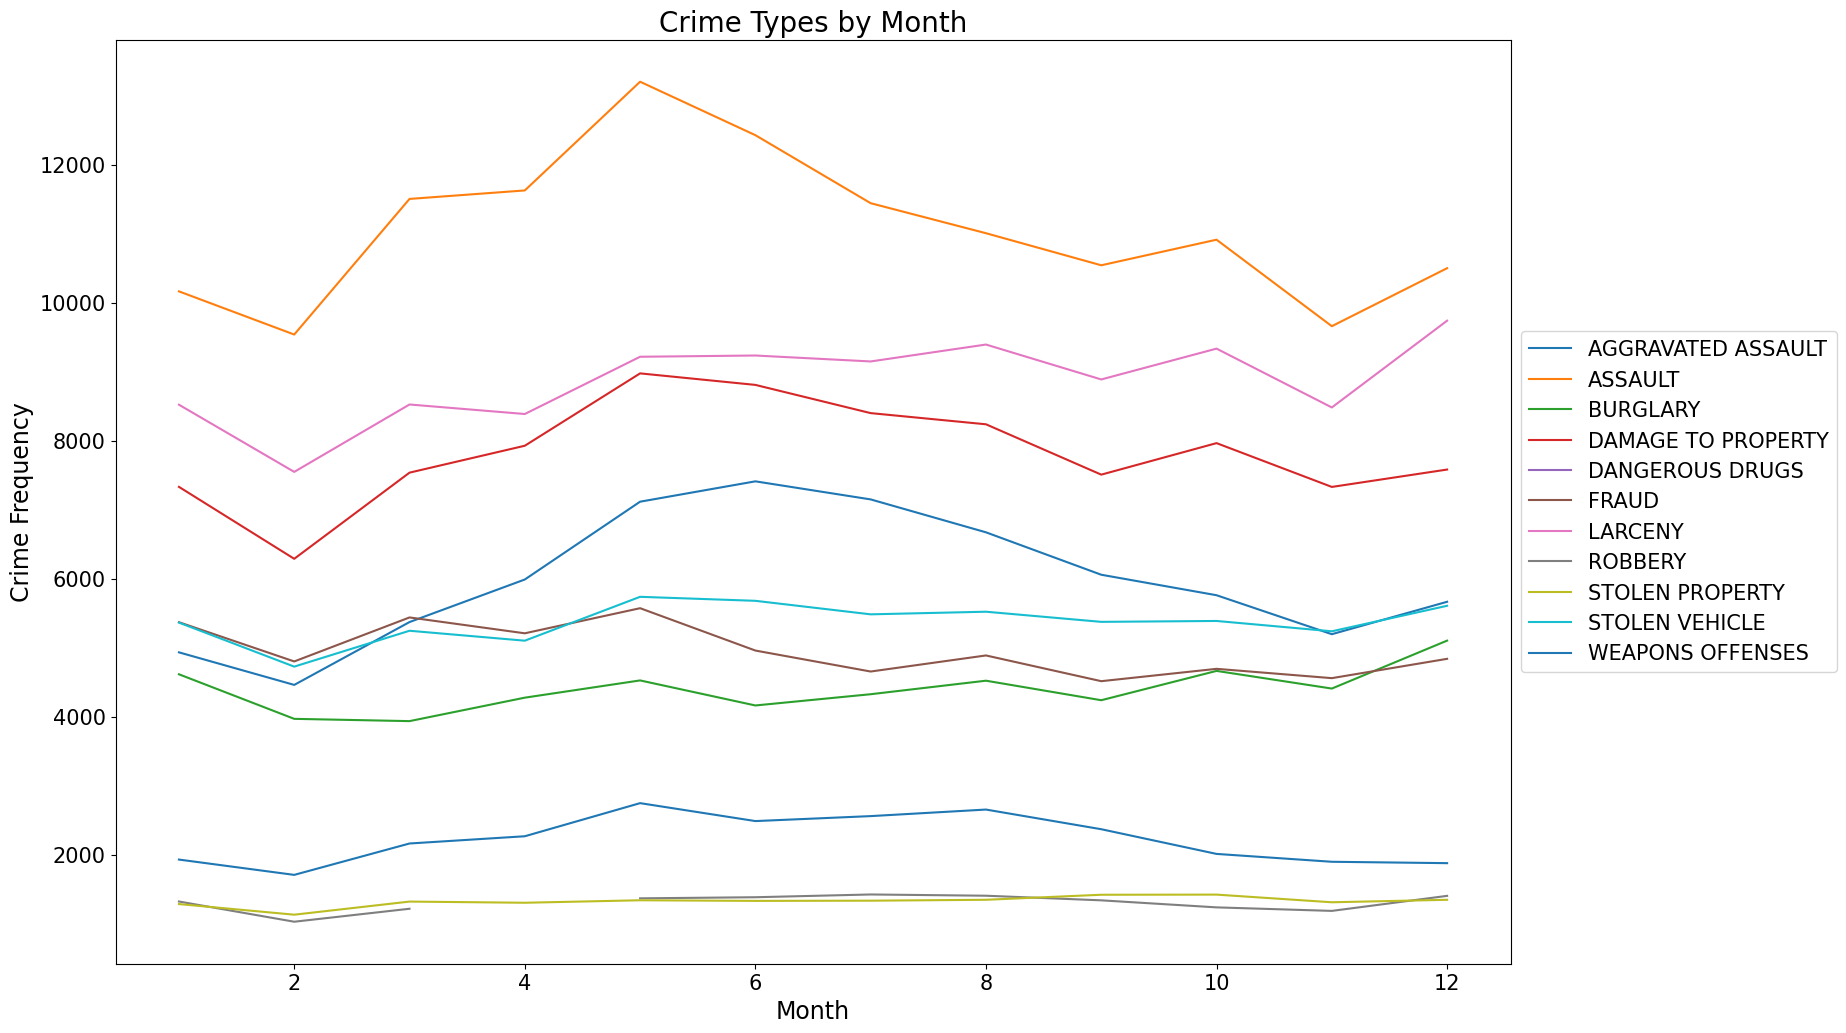

In [24]:
#Crime types per month

fig, ax = plt.subplots(figsize=(18,12))
crimedata.groupby('month')['offense_category'].apply(lambda x: x.value_counts().head(10)).unstack().plot(ax=ax)
plt.title('Crime Types by Month', fontsize = 20)
ax.set_xlabel('Month', fontsize = 17)
ax.set_ylabel('Crime Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})



In [25]:
#Crime Values by Police Precinct
crimedata['police_precinct'].value_counts()

police_precinct
08    91770
09    87937
12    75785
03    74945
06    72217
02    64369
11    56030
10    56006
05    49732
07    47221
04    41147
0       979
HP       99
0W       21
00       15
Name: count, dtype: int64

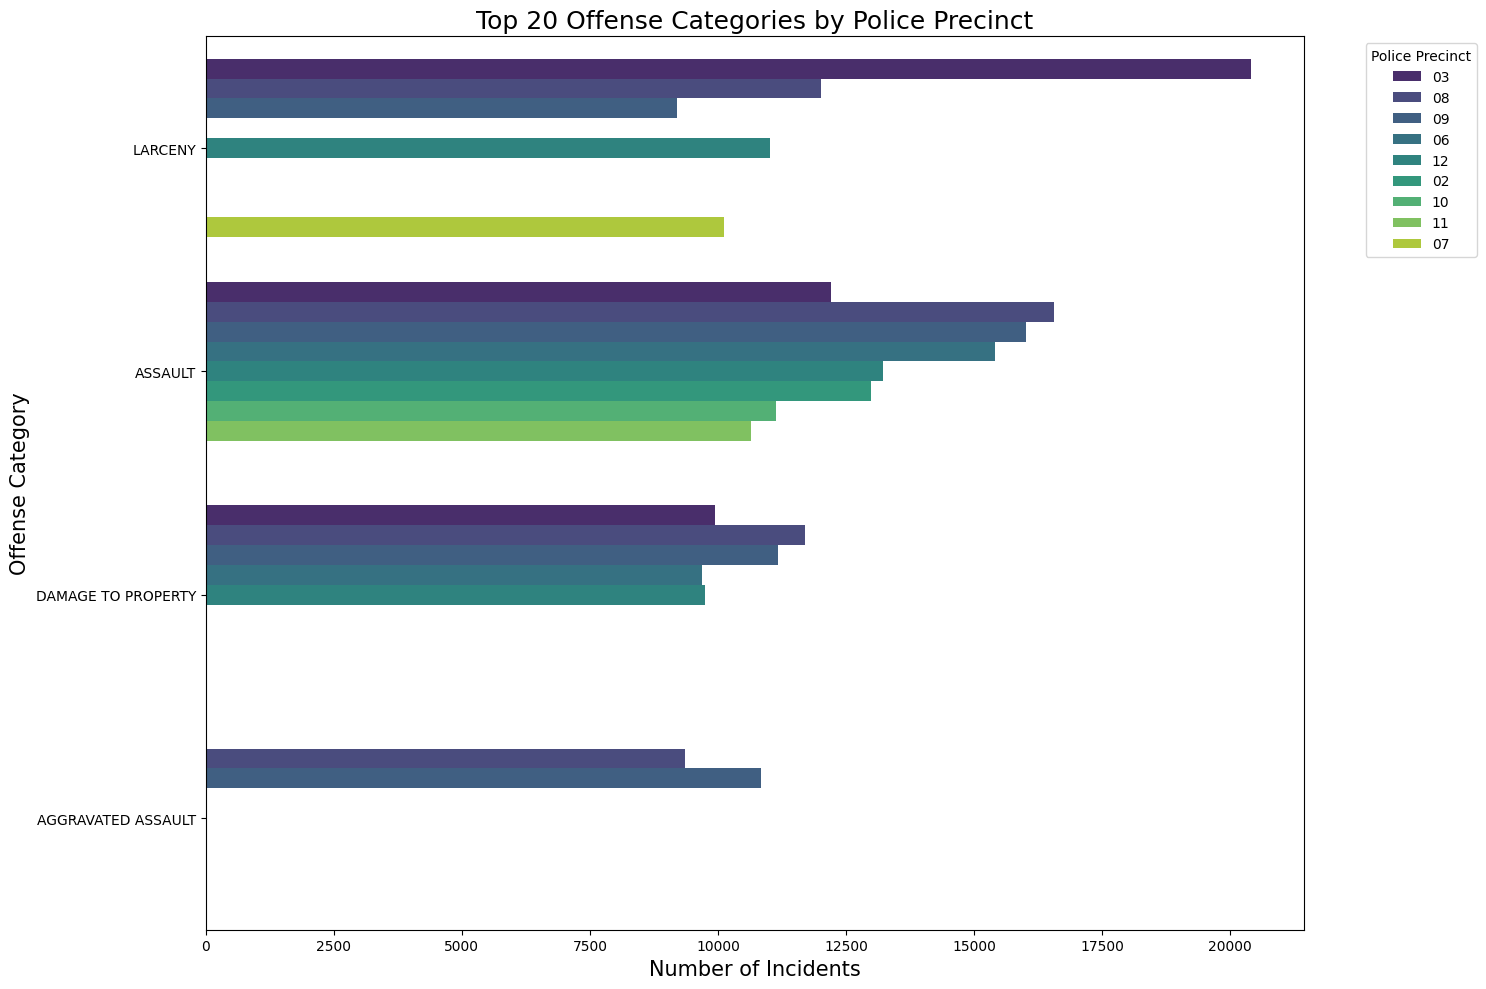

In [26]:
#selecting top crimes captured by police precincts
#top20_offcat = crimedata['offense_category'].value_counts()[0:20]

# Step 1: Group by police_precinct and offense_category and count
grouped = crimedata.groupby(['police_precinct', 'offense_category']).size().reset_index(name='count')

# Step 2: Sort and take top 20 combinations
top20 = grouped.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(15, 10))
sns.barplot(
    data=top20,
    y='offense_category',
    x='count',
    hue='police_precinct',  # Shows which precinct reported the offense
    palette='viridis'
)
plt.title("Top 20 Offense Categories by Police Precinct", fontsize=18)
plt.xlabel("Number of Incidents", fontsize=15)
plt.ylabel("Offense Category", fontsize=15)
plt.legend(title='Police Precinct', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
#finding all unique types of drug crimes
crimedata.loc[crimedata['offense_category'] == 'DANGEROUS DRUGS', 'offense_description'].unique()

array(['VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)',
       'AGGRAVATED / FELONIOUS ASSAULT', 'NARCOTIC EQUIPMENT VIOLATIONS',
       'RETAIL FRAUD - THEFT', 'BURGLARY - FORCED ENTRY',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT', 'STOLEN PROPERTY',
       'LARCENY - THEFT FROM BUILDING',
       'MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)',
       'ENTRY WITHOUT PERMISSION (NO INTENT)', 'MARIJUANA -POSSESS',
       'DAMAGE TO PROPERTY',
       'FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE GAME', 'ROBBERY',
       'FORGERY / COUNTERFEITING', 'NON-FATAL SHOOTING',
       'KIDNAPPING / ABDUCTION',
       'FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE',
       'MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)',
       'MOTOR VEHICLE THEFT', 'MOTOR VEHICLE FRAUD',
       'CSC 1ST DEGREE - PENIS / VAGINA', 'MARIJUANA - DELIVER',
       'FRAUD - IDENTITY THEFT', 'LARCENY FROM GROUNDS',
       'FRAUD - IMPERSONATION',
       'LARCENY - THEFT OF MOTOR VEHICLE PARTS / ACCESSORIES',
     

In [28]:
#finding top five tyoes of drug offenses for each police precinct
crimedata[crimedata.offense_category == 'DANGEROUS DRUGS'].groupby('police_precinct').offense_description.apply(lambda x: x.value_counts().head(5))

police_precinct                                                   
0                VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)          48
                 CARJACKING                                              1
02               VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)         888
                 NARCOTIC EQUIPMENT VIOLATIONS                          31
                 AGGRAVATED / FELONIOUS ASSAULT                         25
                 ASSAULT AND BATTERY/SIMPLE ASSAULT                     21
                 MARIJUANA -POSSESS                                     20
03               VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)         847
                 NARCOTIC EQUIPMENT VIOLATIONS                          49
                 ASSAULT AND BATTERY/SIMPLE ASSAULT                     27
                 AGGRAVATED / FELONIOUS ASSAULT                         13
                 ROBBERY                                                 7
04               VIOLATION OF CON

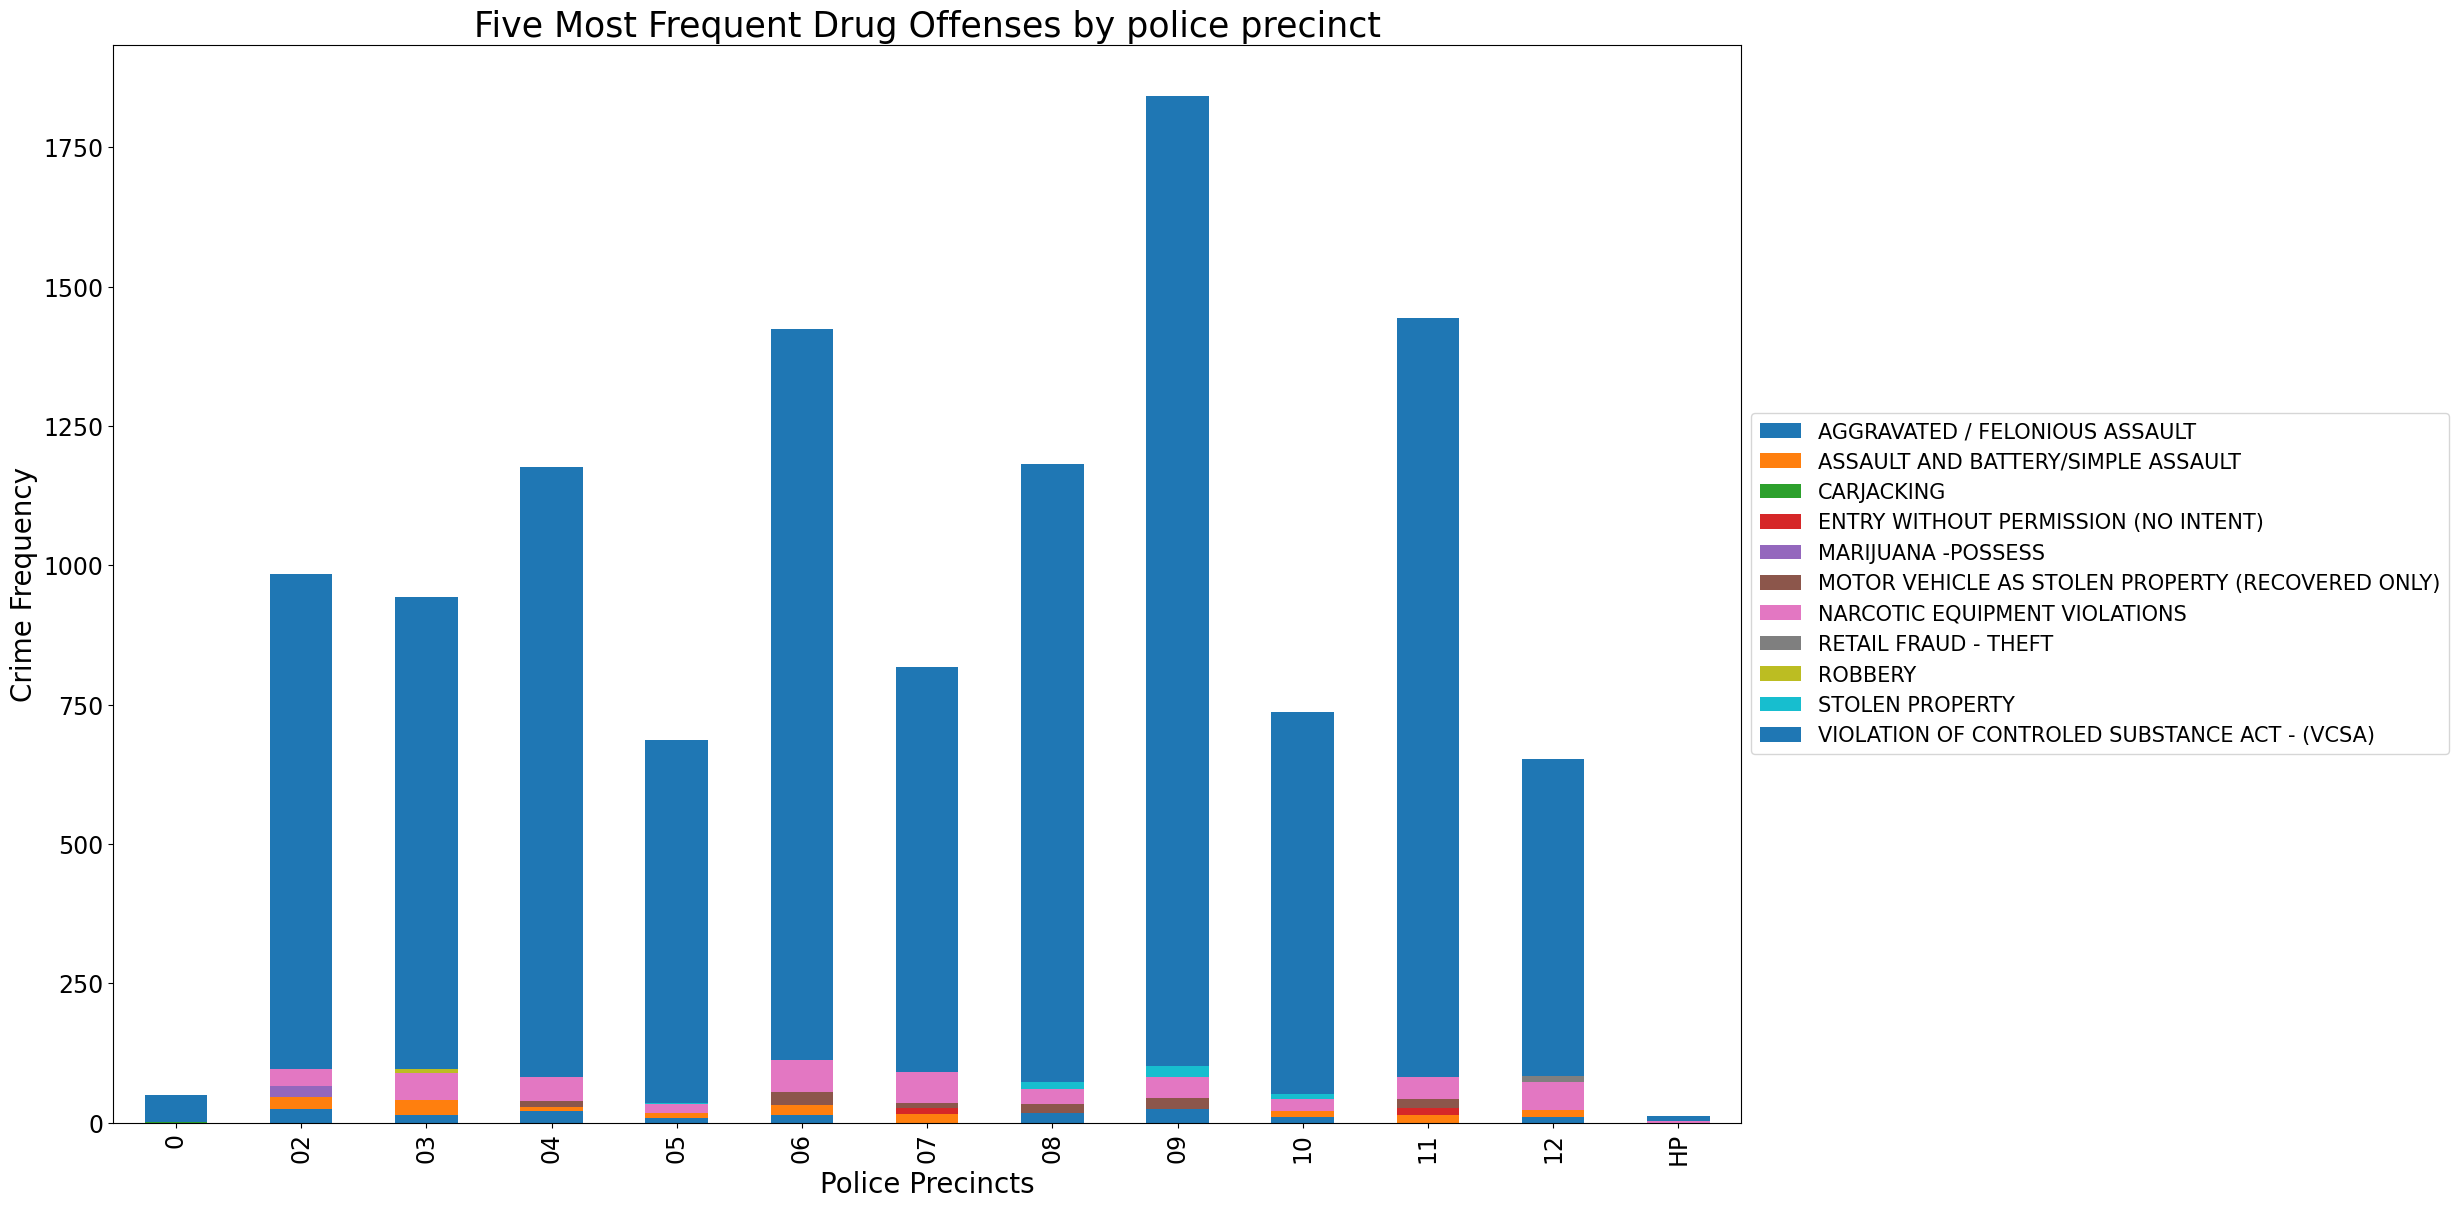

In [29]:
#bar chart for top five types of drug offenses for each police precinct
crimedata[crimedata.offense_category == 'DANGEROUS DRUGS'].groupby('police_precinct').offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Drug Offenses by police precinct', fontsize = 25)
plt.xlabel('Police Precincts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})



In [30]:
#finding all unique types of aggravated assults
crimedata.loc[crimedata['offense_category'] == 'AGGRAVATED ASSAULT', 'offense_description'].unique()

array(['AGGRAVATED / FELONIOUS ASSAULT', 'NON-FATAL SHOOTING',
       'ASSAULT AND BATTERY/SIMPLE ASSAULT',
       'MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)', 'ROBBERY',
       'CSC 3RD DEGREE - ORAL / ANAL', 'KIDNAPPING / ABDUCTION',
       'CSC 4TH DEGREE - FORCIBLE CONTACT', 'INTIMIDATION / STALKING',
       'CSC 1ST DEGREE - PENIS / VAGINA', 'ASSAULT LESS THAN MURDER',
       'REPORT PULLED IN ERROR', 'CITIZEN ASSIST', 'CARJACKING', ' ',
       'CSC 2ND DEGREE - FORCIBLE CONTACT', 'PARENTAL KIDNAPPING',
       'NEGLIGENT HOMICIDE - VEHICLE / BOAT / SNOWMOBILE / ORV',
       'CSC 3RD DEGREE - PENIS / VAGINA', 'WEAPONS OFFENSE - OTHER',
       'AGGRAVATED / FELONIOUS ASSAULT (DOMESTIC)',
       'NEGLIGENT HOMICIDE / MANSLAUGHTER (INVOLUNTARY)',
       'CSC 1ST DEGREE - ORAL / ANAL'], dtype=object)

In [31]:
#Top 5 types of aggravted assults by police precinct
crimedata[crimedata.offense_category == 'AGGRAVATED ASSAULT'].groupby('police_precinct').offense_description.apply(lambda x: x.value_counts().head(5))

police_precinct                                                 
0                AGGRAVATED / FELONIOUS ASSAULT                        68
                 NON-FATAL SHOOTING                                     3
                 KIDNAPPING / ABDUCTION                                 1
                 ASSAULT AND BATTERY/SIMPLE ASSAULT                     1
02               AGGRAVATED / FELONIOUS ASSAULT                      7092
                 NON-FATAL SHOOTING                                   310
                 ASSAULT AND BATTERY/SIMPLE ASSAULT                   112
                 MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)       49
                 KIDNAPPING / ABDUCTION                                21
03               AGGRAVATED / FELONIOUS ASSAULT                      3884
                 NON-FATAL SHOOTING                                   120
                 ASSAULT AND BATTERY/SIMPLE ASSAULT                    66
                 KIDNAPPING / ABDUCTION        

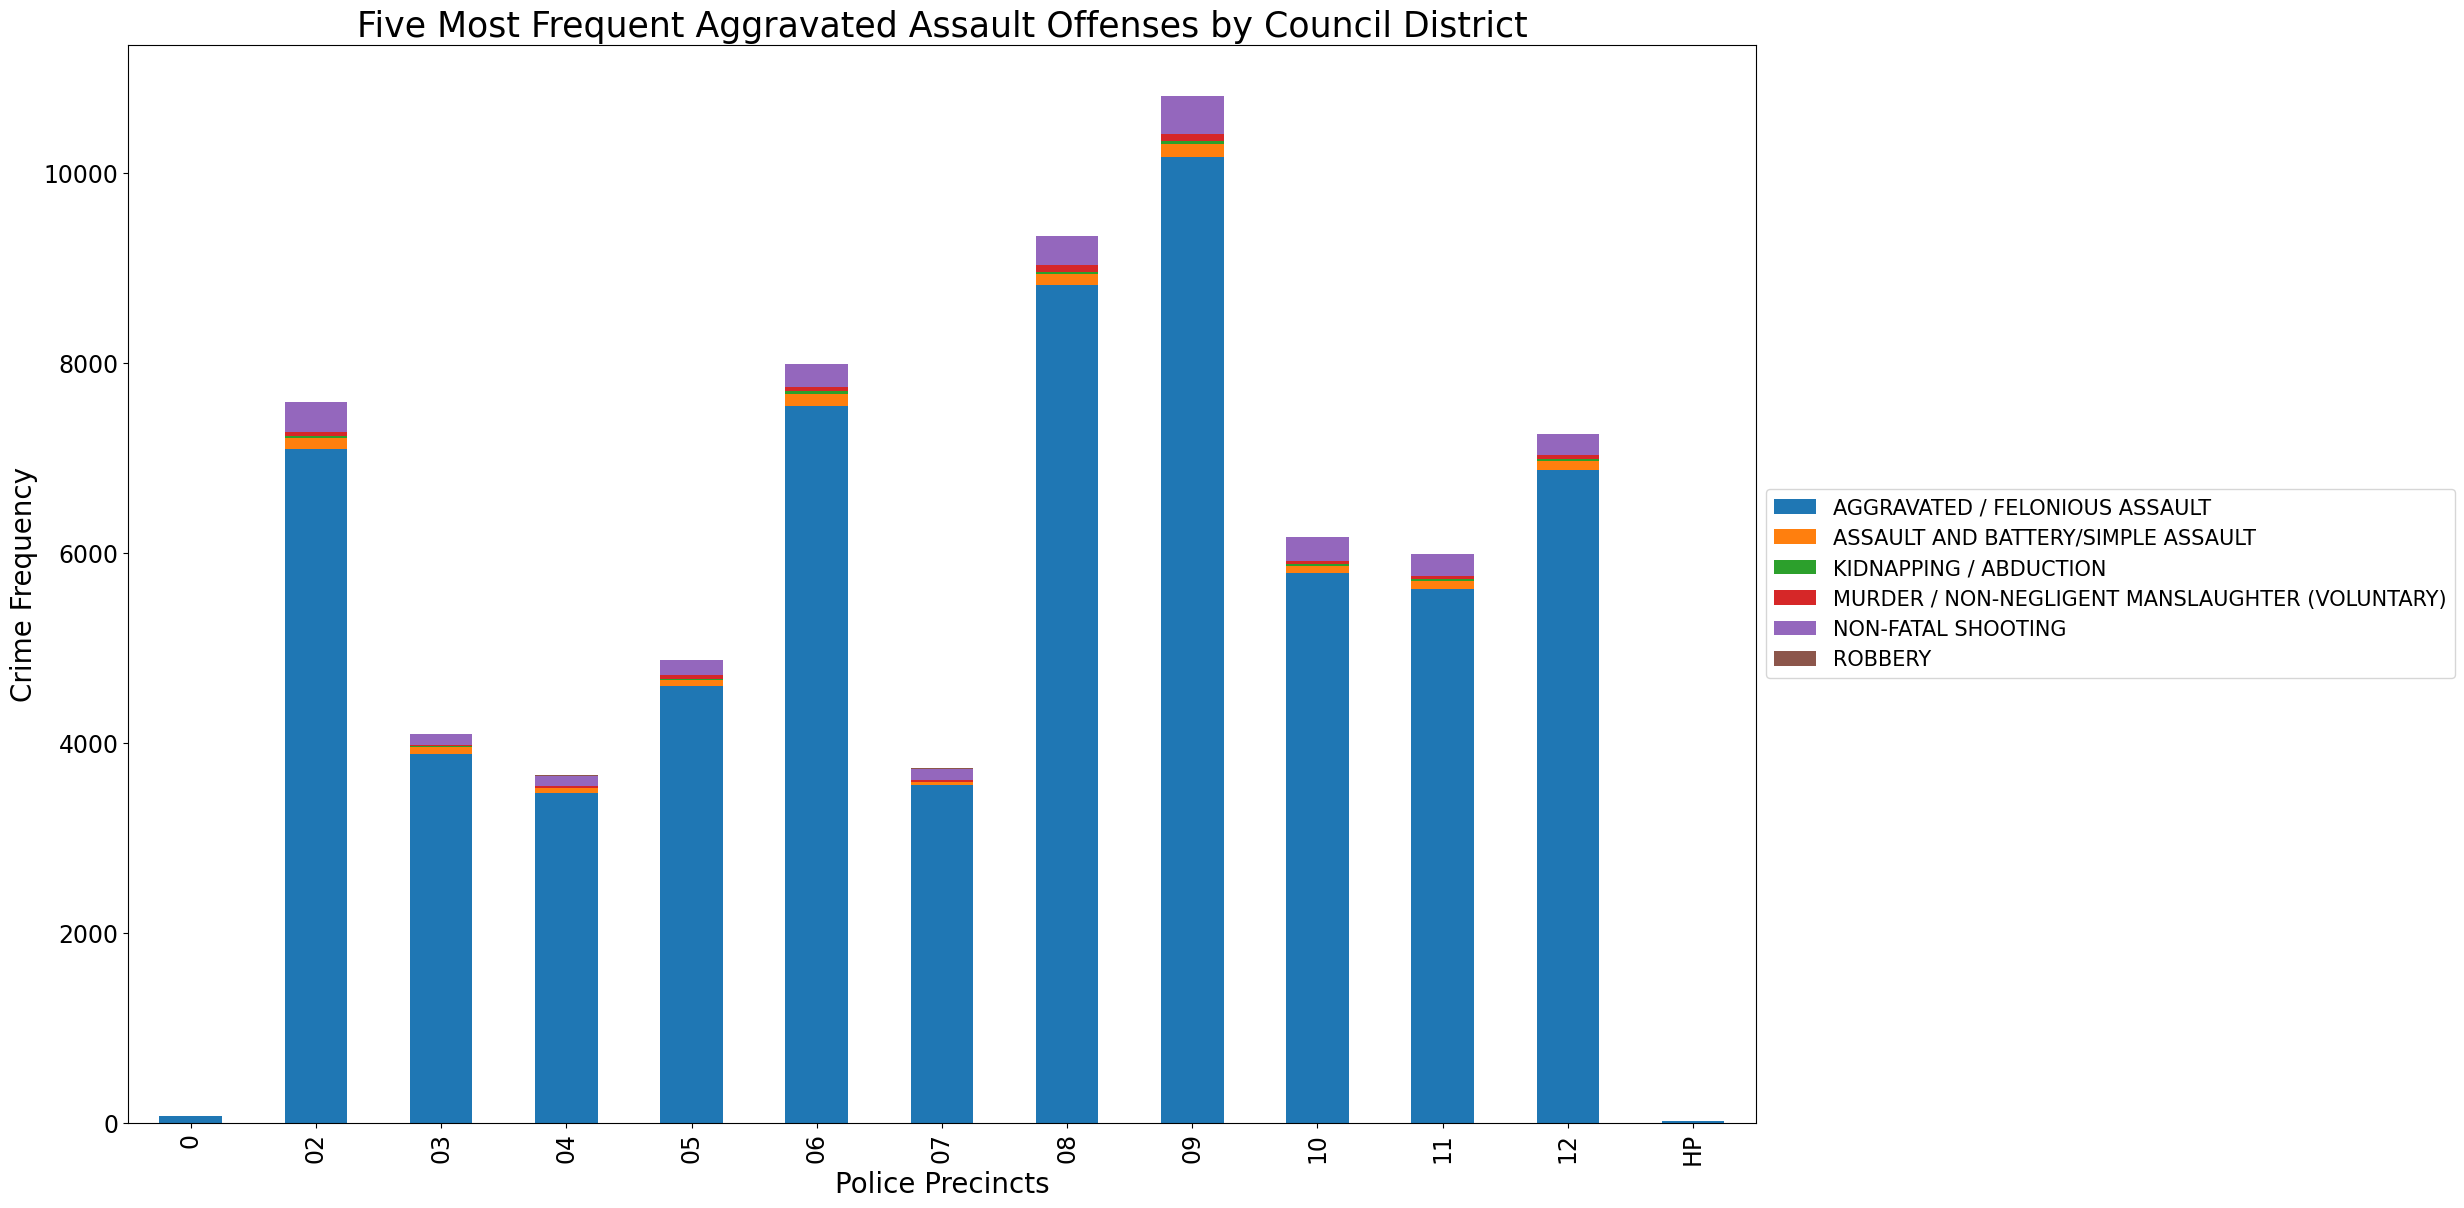

In [32]:
#Bar graph of types of aggravated assults per police precinct

crimedata[crimedata.offense_category == 'AGGRAVATED ASSAULT'].groupby('police_precinct').offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(stacked=True,figsize=(21,14))
plt.title('Five Most Frequent Aggravated Assault Offenses by Council District', fontsize = 25)
plt.xlabel('Police Precincts', fontsize = 20)
plt.ylabel('Crime Frequency', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":15})



In [33]:
"""

III. Hypothesis Testing

Now that we have completed our descriptive analysis, let's draw a testable hypothesis from our observations. From our graph of crime frequencies across police precincts, we noticed that the precinct 9 stood out somewhat from the rest. 
We can use the ANOVA test to ascertain whether the group (council) means for hour are statistically different from each other, particularly in the case of precinct 9.

We can state our hypotheses as the following: 
H0: There is not a statistically meaningful difference between precincts; their means are equal.
Ha: There is a statistically meaningful difference between precincts; at least one mean is not equal.

We will use the significance level of α = 0.05
"""


from statsmodels.formula.api import ols
import statsmodels.api as sm

# Step 1: Convert timestamp to date if not done
crimedata['incident_occurred_at'] = pd.to_datetime(crimedata['incident_occurred_at'], errors='coerce')
crimedata['date'] = crimedata['incident_occurred_at'].dt.date

# Step 2: Aggregate — daily incident count per precinct
daily_counts = crimedata.groupby(['police_precinct', 'date']).size().reset_index(name='incident_count')

# Step 3: Fit OLS model
model = ols('incident_count ~ C(police_precinct)', data=daily_counts).fit()

# Step 4: Run ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)






                          sum_sq       df            F  PR(>F)
C(police_precinct)  1.142408e+06     14.0  1787.538401     0.0
Residual            1.650373e+06  36153.0          NaN     NaN


In [34]:
"""
Since p < 0.05 (in fact, far less), we reject the null hypothesis.
There is a statistically significant difference in the mean daily incident counts between at least one pair of police precincts.
"""

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=daily_counts['incident_count'],
                          groups=daily_counts['police_precinct'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0     00   -0.215    1.0  -6.3952   5.9651  False
     0     02    18.81    0.0  17.8859  19.7341   True
     0     03  21.9451    0.0  21.0217  22.8685   True
     0     04  11.6569    0.0  10.7322  12.5816   True
     0     05  14.2791    0.0  13.3548  15.2034   True
     0     06  21.2321    0.0  20.3081   22.156   True
     0     07  13.5863    0.0  12.6614  14.5111   True
     0     08  27.0289    0.0  26.1058  27.9519   True
     0     09  25.9386    0.0  25.0153  26.8619   True
     0     0W  -0.1812    1.0  -5.5033   5.1409  False
     0     10  16.1827    0.0  15.2587  17.1066   True
     0     11  16.2503    0.0   15.326  17.1746   True
     0     12  22.2273    0.0  21.3038  23.1509   True
     0     HP  -0.2333    1.0  -2.7384   2.2719  False
    00     02   19.025    0.0  12.8876  25.1625   True
    00    

In [ ]:
"""

Interpreting the key columns:
Column	Meaning
group1/group2	The two precincts being compared
meandiff	Difference in their average daily incidents
p-adj	Adjusted p-value (controls for multiple comparisons)
lower/upper	Confidence interval of the mean difference
reject	True = Statistically significant difference at α = 0.05

Key Takeaways from Your Results:
1) Most precinct pairs show significant differences (reject = True)
2) Precinct 0 vs 02, 03, 04, ..., 12 all show significant differences (very small p-values, large mean differences)
3) But comparisons like 0 vs 00, 0 vs 0W, 0 vs HP are not significant (reject = False)
4) This implies that precincts 00, 0W, and HP have similar crime volume to precinct 0
5) Precinct 09 shows a large difference from precinct 0: meandiff = 25.94, p-adj = 0.0, reject = True → statistically significant

Final Conclusion:
There is a statistically meaningful difference in average daily crime incident counts across many precincts.
Precinct 9 in particular stands out as having significantly more incidents than precinct 0 (and likely many others).
This supports my hypothesis and justifies further investigation or resource allocation to that precinct.

"""